In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("balanced_data.csv")
display(df)

,index,contract,invoice_type,billing_type,1,2,3,4,5,6,...,fraud_flag,SERVICE_STATUS,POWER_SUSCRIBED,TARIFF,ACTIVITY_CMS,READWITH,SEGMENT,agency,zone,block
0,1,200235437,0,1,0,30,30,35,67,17,...,1,2,2.2,1,6,1,5,824,21,0
1,2,200236826,0,1,2342,2069,2030,2097,2295,1988,...,1,1,19.8,1,3,2,2,825,2,0
2,3,200236832,0,1,422,234,230,233,223,174,...,1,1,6.6,1,3,1,2,825,2,0
3,4,200236835,0,1,327,476,183,774,491,500,...,1,2,2.2,1,3,1,1,825,2,0
4,5,200237394,0,1,170,19,0,0,0,0,...,1,2,2.2,1,6,1,5,825,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,201809151,0,1,79,168,160,176,194,166,...,0,1,3.3,1,6,1,5,825,4,0
2996,2997,203005467,0,2,7,92,70,0,269,10,...,0,1,2.2,1,6,1,5,326,1,0
2997,2998,203286176,0,2,0,0,0,0,0,0,...,0,1,1.1,1,6,1,5,101,8,0
2998,2999,201890112,0,1,190,0,0,0,101,132,...,0,2,2.2,1,6,1,5,805,7,0


In [3]:
df.columns

Index(['index', 'contract', 'invoice_type', 'billing_type', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', 'fraud_consumption',
       'fraud_flag', 'SERVICE_STATUS', 'POWER_SUSCRIBED', 'TARIFF',
       'ACTIVITY_CMS', 'READWITH', 'SEGMENT', 'agency', 'zone', 'block'],
      dtype='object')

In [4]:
df["fraud_flag"].unique()

array([1, 0])

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

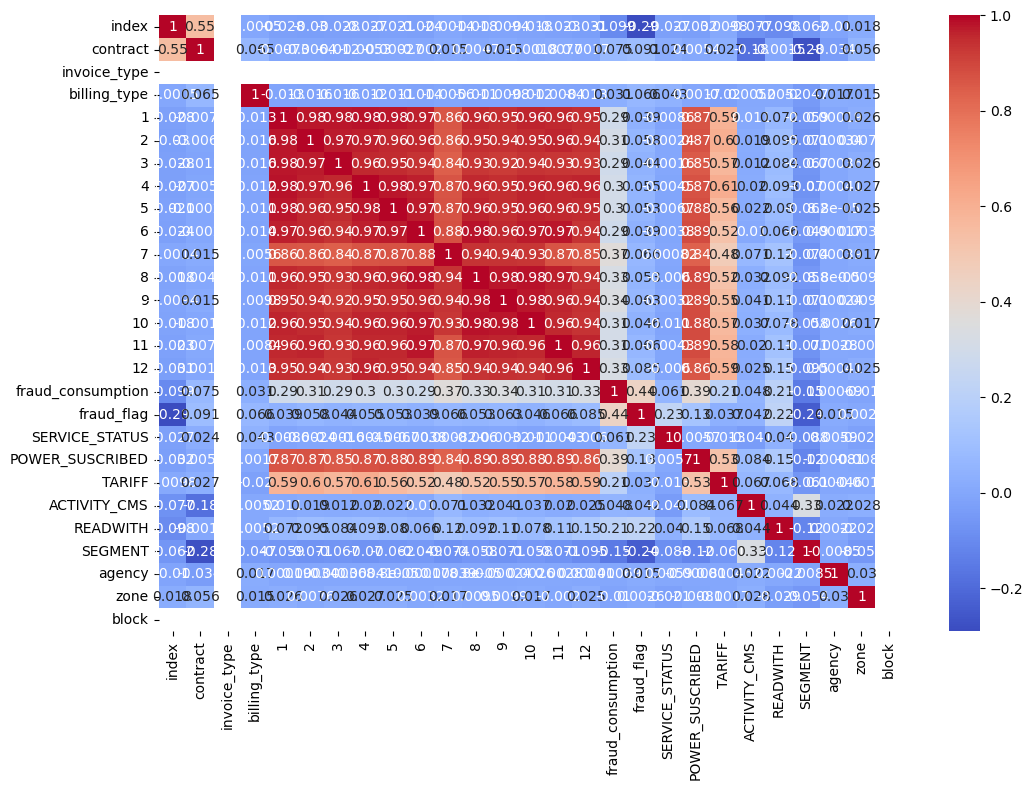

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
df["fraud_flag"].isnull().sum()

0

In [8]:
fraud_counts = df['fraud_flag'].value_counts()

In [9]:
fraud_counts

1    1500
0    1500
Name: fraud_flag, dtype: int64

In [10]:
df['fraud_flag']=df["fraud_flag"].fillna(0)

In [11]:
df["fraud_flag"].isnull().sum()

0

In [12]:
fraud_counts = df['fraud_flag'].value_counts()

In [13]:
fraud_counts

1    1500
0    1500
Name: fraud_flag, dtype: int64

In [14]:
X = df.drop('fraud_flag', axis=1)
y = df['fraud_flag']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3000 non-null   int64  
 1   contract           3000 non-null   int64  
 2   invoice_type       3000 non-null   int64  
 3   billing_type       3000 non-null   int64  
 4   1                  3000 non-null   int64  
 5   2                  3000 non-null   int64  
 6   3                  3000 non-null   int64  
 7   4                  3000 non-null   int64  
 8   5                  3000 non-null   int64  
 9   6                  3000 non-null   int64  
 10  7                  3000 non-null   int64  
 11  8                  3000 non-null   int64  
 12  9                  3000 non-null   int64  
 13  10                 3000 non-null   int64  
 14  11                 3000 non-null   int64  
 15  12                 3000 non-null   int64  
 16  fraud_consumption  3000 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [21]:
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       465

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900

ROC AUC Score: 1.0


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [23]:
svm_model = SVC(kernel='rbf', random_state=42)

In [24]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

NameError: name 'SimpleImputer' is not defined

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

NameError: name 'X_imputed' is not defined

In [26]:
svm_model = SVC(kernel='rbf', random_state=42)

In [27]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [28]:
y_pred = svm_model.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       435
           1       0.00      0.00      0.00       465

    accuracy                           0.48       900
   macro avg       0.24      0.50      0.33       900
weighted avg       0.23      0.48      0.31       900



/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
import pandas as pd

In [32]:
df1=pd.read_csv("balanced_data.csv")

In [ ]:
df1

In [4]:
fraud_counts = df1['fraud_flag'].value_counts()

In [5]:
fraud_counts

1.0    1500
Name: fraud_flag, dtype: int64

In [6]:
df1["fraud_flag"]=df1["fraud_flag"].fillna(0)

In [7]:
fraud_counts = df1['fraud_flag'].value_counts()

In [8]:
fraud_counts

1.0    1500
0.0    1500
Name: fraud_flag, dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3000 non-null   int64  
 1   contract         3000 non-null   int64  
 2   invoice_type     3000 non-null   int64  
 3   billing_type     3000 non-null   int64  
 4   1                2560 non-null   float64
 5   2                2585 non-null   float64
 6   3                2624 non-null   float64
 7   4                2612 non-null   float64
 8   5                2594 non-null   float64
 9   6                2586 non-null   float64
 10  7                2592 non-null   float64
 11  8                2568 non-null   float64
 12  9                2556 non-null   float64
 13  10               2478 non-null   float64
 14  11               2576 non-null   float64
 15  12               2601 non-null   float64
 16  1/1/2019         1500 non-null   float64
 17  fraud_flag    

In [10]:
df1=df1.fillna(0)

In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            3000 non-null   int64  
 1   contract         3000 non-null   int64  
 2   invoice_type     3000 non-null   int64  
 3   billing_type     3000 non-null   int64  
 4   1                3000 non-null   float64
 5   2                3000 non-null   float64
 6   3                3000 non-null   float64
 7   4                3000 non-null   float64
 8   5                3000 non-null   float64
 9   6                3000 non-null   float64
 10  7                3000 non-null   float64
 11  8                3000 non-null   float64
 12  9                3000 non-null   float64
 13  10               3000 non-null   float64
 14  11               3000 non-null   float64
 15  12               3000 non-null   float64
 16  1/1/2019         3000 non-null   float64
 17  fraud_flag    

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

In [13]:
svm_model = SVC(kernel='rbf', random_state=42)

In [16]:
X = df1.drop('fraud_flag', axis=1)
y = df1['fraud_flag']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
svm_model = SVC(kernel='rbf', random_state=42)

In [20]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.49      1.00      0.66       439
         1.0       0.00      0.00      0.00       461

    accuracy                           0.49       900
   macro avg       0.24      0.50      0.33       900
weighted avg       0.24      0.49      0.32       900



/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
y_test

1801    0.0
1190    1.0
1817    0.0
251     1.0
2505    0.0
       ... 
2443    0.0
856     1.0
1983    0.0
166     1.0
59      1.0
Name: fraud_flag, Length: 900, dtype: float64

In [27]:
df1.columns

Index(['index', 'contract', 'invoice_type', 'billing_type', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', '1/1/2019', 'fraud_flag',
       'SERVICE_STATUS', 'POWER_SUSCRIBED', 'TARIFF', 'ACTIVITY_CMS',
       'READWITH', 'SEGMENT', 'agency', 'zone', 'block'],
      dtype='object')

In [28]:
df1["invoice_type"].value_counts()

0    3000
Name: invoice_type, dtype: int64

In [29]:
df1["block"].value_counts()

0    3000
Name: block, dtype: int64

In [31]:

columns_to_drop = ['fraud_flag', 'index', 'contract', 'invoice_type', 'block']
X = df1.drop(columns_to_drop, axis=1)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
svm_model = SVC(kernel='rbf', random_state=42)

In [34]:
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [35]:
y_pred = svm_model.predict(X_test)

In [36]:
y_pred

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1.

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       439
         1.0       1.00      0.93      0.97       461

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



In [38]:
X_train.columns

Index(['billing_type', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '1/1/2019', 'SERVICE_STATUS', 'POWER_SUSCRIBED', 'TARIFF',
       'ACTIVITY_CMS', 'READWITH', 'SEGMENT', 'agency', 'zone'],
      dtype='object')

In [39]:
import joblib

In [40]:
joblib.dump(svm_model, 'final_svm_model.pkl')

['final_svm_model.pkl']

In [46]:
X_imputed=[[1,266,335,366,412,361,326,336,287,251,261,153,183,0,1,6.6,1,6,1,4,830,6]]

In [47]:
loaded_svm_model = joblib.load('final_svm_model.pkl')

In [48]:
predictions = loaded_svm_model.predict(X_imputed)

/Users/harshan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [49]:
predictions

array([0.])

In [1]:
import pandas as pd

In [7]:
df=pd.read_csv("train.csv")

In [8]:
df

,index,contract,invoice_type,billing_type,1,2,3,4,5,6,...,fraud_flag,SERVICE_STATUS,POWER_SUSCRIBED,TARIFF,ACTIVITY_CMS,READWITH,SEGMENT,agency,zone,block
0,844041,200050051,0,1,266.0,335.0,366.0,412.0,361.0,326.0,...,NaN,1,6.6,1,6,1,4,830,6,18
1,5785979,200050053,0,1,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,4,2.2,1,6,1,5,830,6,18
2,8832200,200050056,0,1,20.0,29.0,27.0,5.0,18.0,107.0,...,NaN,1,2.2,1,6,1,5,830,6,18
3,5395809,200050057,0,1,61.0,58.0,28.0,38.0,47.0,25.0,...,NaN,1,2.2,1,6,1,5,830,6,18
4,2927612,200050059,0,1,211.0,403.0,289.0,285.0,375.0,307.0,...,NaN,1,2.2,1,6,1,5,830,6,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550682,7232749,203361171,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,2.2,1,6,1,5,865,4,7
1550683,5580016,203361181,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,2.2,1,6,1,5,865,4,7
1550684,904434,203361309,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,40.0,2,17,2,0,821,9,21
1550685,11345404,203361480,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,40.0,2,13,2,0,806,5,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550687 entries, 0 to 1550686
Data columns (total 27 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1550687 non-null  int64  
 1   contract         1550687 non-null  int64  
 2   invoice_type     1550687 non-null  int64  
 3   billing_type     1550687 non-null  int64  
 4   1                1359918 non-null  float64
 5   2                1363624 non-null  float64
 6   3                1368170 non-null  float64
 7   4                1356670 non-null  float64
 8   5                1350675 non-null  float64
 9   6                1348489 non-null  float64
 10  7                1348154 non-null  float64
 11  8                1350300 non-null  float64
 12  9                1334784 non-null  float64
 13  10               1337436 non-null  float64
 14  11               1337187 non-null  float64
 15  12               1367627 non-null  float64
 16  1/1/2019         1

In [10]:
df["block"].value_counts()

1     148500
2     125792
3      99636
4      88311
5      79081
       ...  
94       137
92       123
98       119
99        63
97        61
Name: block, Length: 100, dtype: int64

In [11]:
df["fraud_flag"].value_counts()

1.0    1658
Name: fraud_flag, dtype: int64

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("balanced_data.csv")

In [3]:
df

,index,contract,invoice_type,billing_type,1,2,3,4,5,6,...,fraud_flag,SERVICE_STATUS,POWER_SUSCRIBED,TARIFF,ACTIVITY_CMS,READWITH,SEGMENT,agency,zone,block
0,4972166,200235437,0,1,0.0,30.0,30.0,35.0,67.0,17.0,...,1,2,2.2,1,6,1,5,824,21,0
1,4646029,200236826,0,1,2342.0,2069.0,2030.0,2097.0,2295.0,1988.0,...,1,1,19.8,1,3,2,2,825,2,0
2,6503487,200236832,0,1,422.0,234.0,230.0,233.0,223.0,174.0,...,1,1,6.6,1,3,1,2,825,2,0
3,1002724,200236835,0,1,327.0,476.0,183.0,774.0,491.0,500.0,...,1,2,2.2,1,3,1,1,825,2,0
4,3626688,200237394,0,1,170.0,19.0,0.0,0.0,0.0,NaN,...,1,2,2.2,1,6,1,5,825,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12066025,203060444,0,1,NaN,NaN,NaN,NaN,48.0,NaN,...,0,1,2.2,1,6,1,5,293,9,0
2996,7154433,201987482,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0,2,2.2,1,6,1,5,808,6,0
2997,1746106,200953086,0,1,47.0,39.0,36.0,40.0,35.0,49.0,...,0,1,2.2,1,3,1,1,841,6,0
2998,8598349,200746722,0,1,87.0,109.0,99.0,121.0,141.0,105.0,...,0,1,2.2,1,6,1,5,802,15,0


In [4]:
df.columns

Index(['index', 'contract', 'invoice_type', 'billing_type', '1', '2', '3', '4',
       '5', '6', '7', '8', '9', '10', '11', '12', 'fraud_consumption',
       'fraud_flag', 'SERVICE_STATUS', 'POWER_SUSCRIBED', 'TARIFF',
       'ACTIVITY_CMS', 'READWITH', 'SEGMENT', 'agency', 'zone', 'block'],
      dtype='object')

In [5]:
df["fraud_consumption"].value_counts()

1584.0     136
1267.0     133
950.0      129
1901.0     117
3168.0     102
          ... 
29676.0      1
16374.0      1
34494.0      1
16439.0      1
19008.0      1
Name: fraud_consumption, Length: 85, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3000 non-null   int64  
 1   contract           3000 non-null   int64  
 2   invoice_type       3000 non-null   int64  
 3   billing_type       3000 non-null   int64  
 4   1                  2560 non-null   float64
 5   2                  2585 non-null   float64
 6   3                  2624 non-null   float64
 7   4                  2612 non-null   float64
 8   5                  2594 non-null   float64
 9   6                  2586 non-null   float64
 10  7                  2592 non-null   float64
 11  8                  2568 non-null   float64
 12  9                  2556 non-null   float64
 13  10                 2478 non-null   float64
 14  11                 2576 non-null   float64
 15  12                 2601 non-null   float64
 16  fraud_consumption  1500 

In [7]:
df["fraud_consumption"]

0       1901.0
1       8554.0
2       3168.0
3       1901.0
4       6653.0
         ...  
2995       NaN
2996       NaN
2997       NaN
2998       NaN
2999       NaN
Name: fraud_consumption, Length: 3000, dtype: float64

In [8]:
fraud_consumption_mean = df['fraud_consumption'].mean()
df["fraud_consumption"]=df["fraud_consumption"].fillna(fraud_consumption_mean, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3000 non-null   int64  
 1   contract           3000 non-null   int64  
 2   invoice_type       3000 non-null   int64  
 3   billing_type       3000 non-null   int64  
 4   1                  2560 non-null   float64
 5   2                  2585 non-null   float64
 6   3                  2624 non-null   float64
 7   4                  2612 non-null   float64
 8   5                  2594 non-null   float64
 9   6                  2586 non-null   float64
 10  7                  2592 non-null   float64
 11  8                  2568 non-null   float64
 12  9                  2556 non-null   float64
 13  10                 2478 non-null   float64
 14  11                 2576 non-null   float64
 15  12                 2601 non-null   float64
 16  fraud_consumption  0 non

In [10]:
df["fraud_consumption"]

0       None
1       None
2       None
3       None
4       None
        ... 
2995    None
2996    None
2997    None
2998    None
2999    None
Name: fraud_consumption, Length: 3000, dtype: object

In [11]:
fraud_consumption_mean

3862.5653333333335